# Pytorch interoperability

In this notebook we test interoperabilty of Pytorch tensors with clesperanto. This demonstrate API connection only, data transfert and convertion is still required under the hood.

> WIP: some functionnality are still in development

In [1]:
import torch
import numpy as np
import pyclesperanto as cle

In [2]:
tensor = torch.zeros((10, 10))
tensor[1:3, 1:3] = 1
tensor[5:7, 5:7] = 1

## Pushing tensors to the GPU

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32, mtype=buffer)
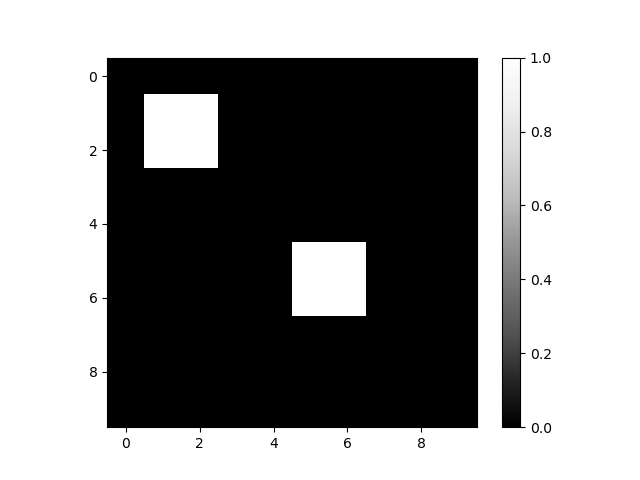
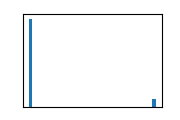

In [3]:
cle_tensor = cle.push(tensor)
cle_tensor

... turns the tensor into an OpenCL-Array

In [4]:
type(cle_tensor)

pyclesperanto._pyclesperanto._Array

## Passing tensors as arguments
You can also just pass a tensor as argument to clesperanto functions. The tensor will be pushed to the GPU implicitly anyway.

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint32, mtype=buffer)
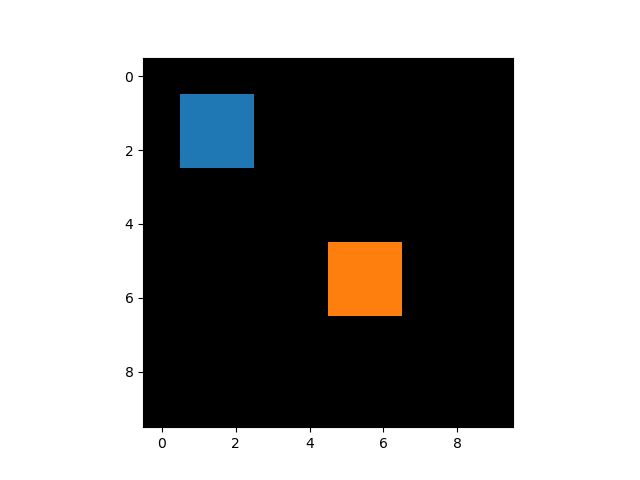

In [5]:
cle_labels = cle.label(tensor)
cle_labels

## Converting results back to a tensor
To turn the OpenCL image into a tensor, you need to call the `get()` function. Furthermore, in case of label images, you need to convert them into a pixel type that is accepted by pytorch, for example signed 32-bit integer.

In [6]:
labels_tensor = torch.tensor(cle_labels.astype(np.int32).get())
type(labels_tensor)

torch.Tensor

## GPU Tensors 
Tensors that are stored on the GPU and managed by Pytorch need to be transferred back to the CPU memory before pushing them back to OpenCL/GPU memory. This happens transparently under the hood but may cause performance leaks due to memory transfer times.

In [7]:
torch.cuda.is_available()

True

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [9]:
tensor.is_cuda

False

In [10]:
cuda_tensor = tensor.to(device)
cuda_tensor.is_cuda

True

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32, mtype=buffer)
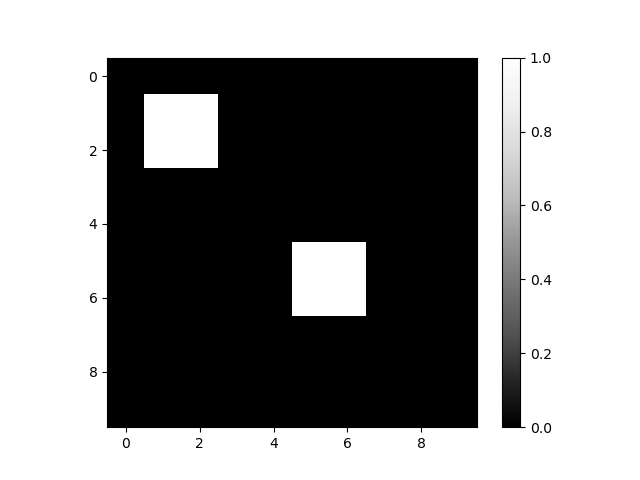
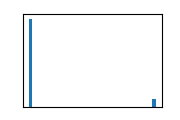

In [11]:
cle.push(cuda_tensor)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint32, mtype=buffer)
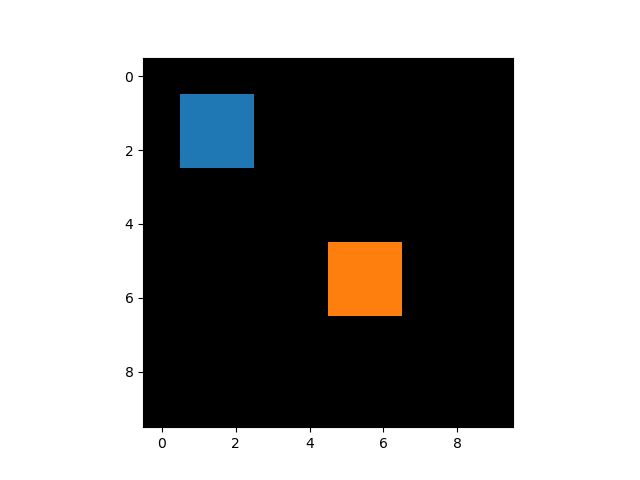

In [12]:
cle.label(cuda_tensor)